In [5]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt
# Loading necessary libraries

In [7]:
f = open("dialogs.txt", "r")
print(f.read())
# reading the data 

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [9]:
df=pd.read_csv('dialogs.txt',names=('Query','Response'),sep=('\t'))
# Reading the data

In [11]:
df
# loading the data

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


## Data Understanding

In [13]:
df.shape
# There are 3724 rows and 2 columns in our dataset

(3725, 2)

In [15]:
df.columns
# Displaying the names of columns present in the dataset

Index(['Query', 'Response'], dtype='object')

In [17]:
df.info()
# Checking information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [19]:
df.describe()
# Describe function shows us the frequency,unique and counts of all columns

,Query,Response
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [21]:
df.nunique()
# nunique() function return number of unique elements in the object. 

Query       3510
Response    3512
dtype: int64

In [23]:
df.isnull().sum()
# Checking for the presence of null values in the data. As we can see there are no null values present in the data

Query       0
Response    0
dtype: int64

In [25]:
df['Query'].value_counts()
# Checking the counts of the values present in the column 'Query'

Query
what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: count, Length: 3510, dtype: int64

In [27]:
df['Response'].value_counts()
# Checking the counts of the values present in the column 'Response'

Response
what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: count, Length: 3512, dtype: int64

## Data Visualization

In [35]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vk269\AppData\Roaming\nltk_data...


True

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [39]:
Text=df['Query']

In [41]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

hi, how are you doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm fine. how about yourself?
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
i'm pretty good. thanks for asking.
neg: 0.0, neu: 0.25, pos: 0.75, compound: 0.8402, 
no problem. so how have you been?
neg: 0.495, neu: 0.505, pos: 0.0, compound: -0.5994, 
i've been great. what about you?
neg: 0.0, neu: 0.549, pos: 0.451, compound: 0.6249, 
i've been good. i'm in school right now.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
what school do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i go to pcc.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you like it there?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
it's okay. it's a really big campus.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 
good luck with school.
neg: 0.0, neu: 0.253, pos: 0.747, compound: 0.7096, 
how's it going?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm doing well. how about you?
neg: 0.0, neu: 0.704, pos: 0.2

the baby was 8 pounds 6 ounces.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's good to hear.
neg: 0.0, neu: 0.508, pos: 0.492, compound: 0.4404, 
will you go and visit them?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
of course i will.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i just wanted to give you the good news.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
have you heard the news?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i haven't heard anything.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
debrah had her baby last week.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
nobody told me.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i thought you heard.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i really wasn't told anything.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
she was a cute 8 pounds 6 ounces.
neg: 0.0, neu: 0.571, pos: 0.429, compound: 0.4588, 
wow, how exciting.
neg: 0.0, neu: 0.125, pos: 0.875, compound: 0.7906, 
i know, you should really go an

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm having a party next saturday.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
that's nice.
neg: 0.0, neu: 0.263, pos: 0.737, compound: 0.4215, 
are you going to be there?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't think so.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
is there a reason why?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i just really don't want to go.
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.1281, 
how come?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't really like parties.
neg: 0.705, neu: 0.295, pos: 0.0, compound: -0.5846, 
what's up?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
nothing much, what's going on?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm having a party this friday.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
oh, really? that's nice.
neg: 0.0, neu: 0.494, pos: 0.506, compound: 0.4728, 
i wanted to see if you wanted to come.
neg: 0.0, neu: 1.0, pos: 0.0, comp

neg: 0.0, neu: 0.27, pos: 0.73, compound: 0.4019, 
did you tell her about school?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i told her that school is fun.
neg: 0.0, neu: 0.602, pos: 0.398, compound: 0.5106, 
did you put the letter in an envelope?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, and i sealed the envelope.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
did you put a stamp on the envelope?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i couldn't find any stamps.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're in the kitchen drawer.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
okay. i just put a stamp on the envelope.
neg: 0.0, neu: 0.759, pos: 0.241, compound: 0.2263, 
give me the envelope, and i'll mail it for you.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why are you yawning?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm sleepy.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why don't you go to bed?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.412, pos: 0.588, compound: 0.431, 
that's what you think.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
if i smelled bad, i could smell me.
neg: 0.412, neu: 0.588, pos: 0.0, compound: -0.5423, 
i can smell you.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i can smell you, too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's my perfume.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
something's wrong with my computer.
neg: 0.437, neu: 0.563, pos: 0.0, compound: -0.4767, 
exactly what?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
all i get is a black screen.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's the matter?
neg: 0.0, neu: 0.645, pos: 0.355, compound: 0.0258, 
i think i know, because this happened before.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what happened before?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
my hard drive crashed.
neg: 0.318, neu: 0.682, pos: 0.0, compound: -0.1027, 
oh, no. that's bad news.
neg: 0.655, neu: 0.345, pos: 0.0, 

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's the automatic teller machine.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it gives you money?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i just insert my debit card into the machine.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
and it gives you money?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, it gives me money, but it's my own money.
neg: 0.0, neu: 0.853, pos: 0.147, compound: 0.1406, 
did you put the blue bin out on the street?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh, no. i forgot.
neg: 0.524, neu: 0.476, pos: 0.0, compound: -0.296, 
well, you'd better take it out front.
neg: 0.0, neu: 0.5, pos: 0.5, compound: 0.6124, 
what time does the recycle truck come by?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it usually gets here at noon on tuesday, which is tomorrow.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll just take it out to the street tomorrow morning.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i use a calling card.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
where do you get that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i buy it at the dollar store.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how much is it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's one dollar for 100 minutes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's only a penny a minute!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's a great price. but you have to dial a lot of numbers.
neg: 0.0, neu: 0.797, pos: 0.203, compound: 0.3716, 
how many?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
first you dial seven numbers, then ten numbers, then ten more numbers.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you go to college?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, i do.
neg: 0.0, neu: 0.27, pos: 0.73, compound: 0.4019, 
what college do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i go to pasadena city college.
neg: 

yes, he pushed him off the hood of the car.
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.4019, 
no, he said he gently placed the boy on the street.
neg: 0.155, neu: 0.634, pos: 0.211, compound: 0.2023, 
so what? they still drove off.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the husband said a fire department was nearby.
neg: 0.286, neu: 0.714, pos: 0.0, compound: -0.34, 
so what? did he dial 911?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
he said he was thinking about it, but he didn't get around to it.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't like riding the bus.
neg: 0.345, neu: 0.655, pos: 0.0, compound: -0.2755, 
why not?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the seats and windows are dirty.
neg: 0.367, neu: 0.633, pos: 0.0, compound: -0.4404, 
don't they clean the bus every night?
neg: 0.273, neu: 0.727, pos: 0.0, compound: -0.3089, 
i think they do.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you should bring some wipes with you.
neg: 0.0, neu: 1.0

well, i can always pull over.
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
no, thank you, i'll just wait.
neg: 0.253, neu: 0.46, pos: 0.287, compound: 0.0772, 
we can kill two birds with one stone.
neg: 0.402, neu: 0.598, pos: 0.0, compound: -0.6908, 
what do you mean?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
while you're using the bathroom, i'll order some food.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
don't order for me. i'm not hungry.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
this is such a long light.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
look how many cars are waiting in line.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they need a left-turn arrow.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
only two cars can make a left turn every three or four minutes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
we'll be here forever.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
get out of this lane.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but we need 

neg: 0.345, neu: 0.655, pos: 0.0, compound: -0.2755, 
no, today people like lots of action.
neg: 0.227, neu: 0.515, pos: 0.258, compound: 0.0772, 
i like a good story.
neg: 0.0, neu: 0.156, pos: 0.844, compound: 0.6597, 
i like to see actors who are like real people.
neg: 0.0, neu: 0.583, pos: 0.417, compound: 0.6124, 
like real people with real problems.
neg: 0.293, neu: 0.435, pos: 0.272, compound: -0.0516, 
they still make movies like that.
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
do you get pbs on tv?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, everybody gets the public broadcasting system.
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.4019, 
it puts me to sleep.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tell me about it.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a gardening show follows a knitting show.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a cooking show follows a sewing show.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a travel show follows ano

neg: 0.268, neu: 0.732, pos: 0.0, compound: -0.296, 
i can't believe how long this line is.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
this is a popular restaurant, isn't it?
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
yes, but it isn't a fast-food restaurant, is it?
neg: 0.0, neu: 0.791, pos: 0.209, compound: 0.2144, 
it's the slowest hamburger in town.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's because they cook it while you wait.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes. that's why it's also the best hamburger in town.
neg: 0.0, neu: 0.537, pos: 0.463, compound: 0.7845, 
a great burger and great service.
neg: 0.0, neu: 0.268, pos: 0.732, compound: 0.8481, 
yes, the workers are very polite.
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
and they're clean.
neg: 0.0, neu: 0.426, pos: 0.574, compound: 0.4019, 
i've been coming here for years.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
me too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
lunch was

neg: 0.388, neu: 0.612, pos: 0.0, compound: -0.6908, 
i want to go to the ball game.
neg: 0.0, neu: 0.822, pos: 0.178, compound: 0.0772, 
is there a game tonight?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, it starts at 7 p.m.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
can we get tickets?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, but only the cheap tickets.
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.2144, 
how much are they?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're only $5 each.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's a good price.
neg: 0.0, neu: 0.408, pos: 0.592, compound: 0.4404, 
yes, it's cheaper than a hot dog or a beer.
neg: 0.0, neu: 0.722, pos: 0.278, compound: 0.4019, 
where are the seats?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're behind the outfield.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
golf is so hard.
neg: 0.384, neu: 0.616, pos: 0.0, compound: -0.2183, 
what's so hard about hitting a little white ba

neg: 0.286, neu: 0.714, pos: 0.0, compound: -0.34, 
why is that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
because of all the earthquakes and fires.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but big earthquakes happen only once in a while.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
once in a while is once too many.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but you're right. there are a lot of fires.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a recent fire destroyed 85 homes.
neg: 0.651, neu: 0.349, pos: 0.0, compound: -0.6808, 
still, it's safer than florida.
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.4215, 
florida doesn't have earthquakes or fires.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no, florida just has hurricanes every year from june to october.
neg: 0.18, neu: 0.82, pos: 0.0, compound: -0.296, 
but most of those hurricanes are harmless.
neg: 0.0, neu: 0.706, pos: 0.294, compound: 0.3612, 
i went to hawaii on vacation.
neg: 0.0, neu: 1.0, pos: 0.0, co

it's always nice to finish a job.
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
well, it's good and bad.
neg: 0.333, neu: 0.19, pos: 0.476, compound: 0.128, 
what's bad about it?
neg: 0.538, neu: 0.462, pos: 0.0, compound: -0.5423, 
when you finish, all you do is start another job!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, that's right. it does get boring.
neg: 0.23, neu: 0.5, pos: 0.27, compound: 0.1027, 
especially if it's the same work, over and over.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but that's what most people do.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, i guess most of us are stuck in a routine.
neg: 0.171, neu: 0.598, pos: 0.231, compound: 0.1779, 
i think i have the worst boss in the world.
neg: 0.369, neu: 0.631, pos: 0.0, compound: -0.6249, 
what makes him so bad?
neg: 0.529, neu: 0.471, pos: 0.0, compound: -0.6696, 
he's rude and he yells a lot.
neg: 0.375, neu: 0.625, pos: 0.0, compound: -0.4588, 
that's hard to take.
neg: 0.318, neu: 0

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i love peanuts.
neg: 0.0, neu: 0.192, pos: 0.808, compound: 0.6369, 
me, too. i love them roasted and salted.
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.6369, 
i love boiled peanuts.
neg: 0.0, neu: 0.323, pos: 0.677, compound: 0.6369, 
boiled? i never heard of that.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
just boil raw peanuts in salt water until the shells are soft.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll have to try them sometime.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're best when they're hot.
neg: 0.0, neu: 0.488, pos: 0.512, compound: 0.6369, 
my brother is allergic to peanuts.
neg: 0.306, neu: 0.694, pos: 0.0, compound: -0.296, 
that's not good.
neg: 0.546, neu: 0.454, pos: 0.0, compound: -0.3412, 
no, it isn't. he almost died when he was little.
neg: 0.17, neu: 0.62, pos: 0.21, compound: 0.1298, 
i guess he has to be very careful about what he eats.
neg: 0.0, neu: 0.841, pos: 0.159, compound: 0.2247, 


neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't even know why we need to fix it.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
in case we have visitors.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but they can just knock on the door.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
actually, i want him to look at our carpet, too.
neg: 0.0, neu: 0.86, pos: 0.14, compound: 0.0772, 
do you like this house?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
yes, it's beautiful.
neg: 0.0, neu: 0.132, pos: 0.868, compound: 0.765, 
it's perfect for us and the kids.
neg: 0.0, neu: 0.619, pos: 0.381, compound: 0.5719, 
three bedrooms, three bathrooms, and a big back yard.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
and we can afford it!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so are we going to buy it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm afraid not.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's too far from your job, isn't it?
neg: 0.0, neu: 1.0, pos: 0.0, comp

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you mean on measures 1, 2, and 3?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes. the ones that will improve our schools, roads, and hospitals.
neg: 0.0, neu: 0.616, pos: 0.384, compound: 0.6808, 
you mean the measures that will raise our taxes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but the tv ads say that our taxes will not increase.
neg: 0.196, neu: 0.804, pos: 0.0, compound: -0.3491, 
do you believe the tv ads?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i like the one where the fireman tells us why we should vote yes.
neg: 0.0, neu: 0.679, pos: 0.321, compound: 0.6369, 
don't believe him! whatever the tv ads tell you, the opposite is true.
neg: 0.0, neu: 0.795, pos: 0.205, compound: 0.4753, 
but the title of measure 1 is "better schools at no cost."
neg: 0.179, neu: 0.575, pos: 0.246, compound: 0.2617, 
the title should be "better schools at huge cost."
neg: 0.0, neu: 0.574, pos: 0.426, compound: 0.6369, 
i can't believe

In [43]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [45]:
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [47]:
from wordcloud import WordCloud
# importing word cloud

In [49]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud    

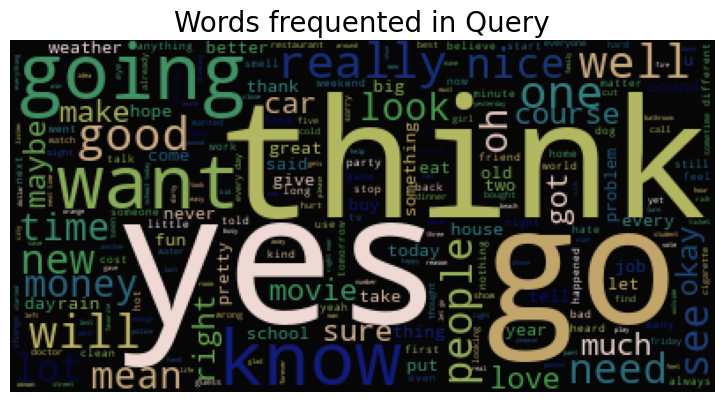

In [51]:
wordcloud(df,'Query')
# top words in the query column

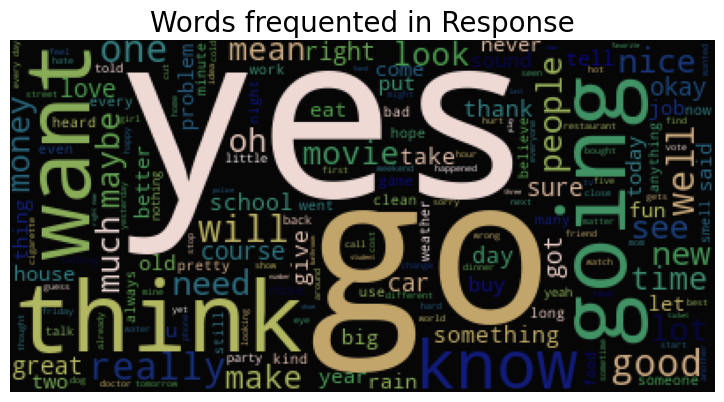

In [53]:
wordcloud(df,'Response')
# top words in the response column

## Text-Normalization

In [22]:
# Removing special characters

In [55]:
import re
# importing regular expressions

In [57]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion

In [59]:
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value

In [61]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters

In [63]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\vk269\AppData\Local\Temp\ipykernel_19320\1192342939.py:1: SyntaxWarning: invalid escape sequence '\w'
  alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)


In [65]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column

In [67]:
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on response column

In [69]:
df
# final cleaned dataset

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3721,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


In [73]:
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset

In [75]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
5,i ve been good i m in school right now,what school do you go to,0.000,0.707,0.293,0.4404
6,what school do you go to,i go to pcc,0.000,1.000,0.000,0.0000
7,i go to pcc,do you like it there,0.000,1.000,0.000,0.0000
8,do you like it there,it s okay it s a really big campus,0.000,0.615,0.385,0.3612
9,it s okay it s a really big campus,good luck with school,0.000,0.725,0.275,0.2263


### Important Sentence

In [77]:
imp_sent=df.sort_values(by='compound', ascending=False)
# arranging the compound column in descending order to find the best sentence. 

In [79]:
imp_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


### Top Positive Sentence

In [81]:
pos_sent=df.sort_values(by='pos', ascending=False)
# Arranging the dataframe by positive column in descending order to find the best postive sentence.

In [83]:
pos_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


### Top Negative Sentence

In [85]:
neg_sent=df.sort_values(by='neg', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [87]:
neg_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


### Top Neutral Sentence

In [89]:
neu_sent=df.sort_values(by='neu', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best neutral sentence.

In [91]:
neu_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh that s so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0
1598,i don t understand,if you pour water into a glass the water goes...,0.0,1.0,0.0,0.0


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
# importing tfidf vectorizer

In [95]:
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF

In [97]:
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array

In [109]:
#tfidf.get_feature_names()
feature_names = tfidf.get_feature_names_out()
# displaying feature names
feature_names

array(['able', 'about', 'absolutely', ..., 'yy', 'zip', 'zoo'],
      dtype=object)

# Application

In [103]:
from sklearn.metrics.pairwise import cosine_distances

In [105]:
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = nu.lemmatization_sentence(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [107]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: # 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])

USER:  hi


logs:
 Matched Question: 'hi  how are you doing '
 Confidence Score: 68.06 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  i m fine  how about yourself 


USER:  i am good. did you get fat


logs:
 Matched Question: 'did you get fat '
 Confidence Score: 70.10 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  no  but i did put on a few pounds 


USER:  exit
